In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from   matplotlib import pyplot as plt
import scipy

In [2]:
sample_signal = np.loadtxt('E:\OneDrive - KookminUNIV\KMU==Lab\MCSP==Research-Papers\SCI-02\Software\ProgrammingCodes\DataBase\data(mod)\\YJL_356_0313_2023.csv', delimiter=',')
bs = sample_signal[:,2]
gs = sample_signal[:,1]
rs = sample_signal[:,0]
sos  = scipy.signal.butter(N=2, Wn=8.0, btype='low',  fs=24, output='sos')  ### The sampling frequency of the digital system(‘fs’).second-order sections (‘sos’)
sos1 = scipy.signal.butter(N=2, Wn=0.5, btype='high', fs=24, output='sos')
fil_s_b = scipy.signal.sosfilt(sos, bs)[10:]  
fil_s_g = scipy.signal.sosfilt(sos, gs) 
fil_s_r = scipy.signal.sosfilt(sos, rs)[10:] 
fil_s_b1 = scipy.signal.sosfilt(sos1, fil_s_b)[110:] + np.mean(fil_s_b) 
fil_s_g1 = scipy.signal.sosfilt(sos1, fil_s_g) + np.mean(fil_s_g)   
fil_s_r1 = scipy.signal.sosfilt(sos1, fil_s_r)[110:] + np.mean(fil_s_r)
db= pd.DataFrame(fil_s_b1)
import os  
os.makedirs('E:\OneDrive - KookminUNIV\KMU==Lab\meeting report\csv files', exist_ok=True) 
db.to_csv('E:\OneDrive - KookminUNIV\KMU==Lab\meeting report\csv files\\YJL356_blue_bdr.csv')
dm= pd.DataFrame(fil_s_g1)
import os  
os.makedirs('E:\OneDrive - KookminUNIV\KMU==Lab\meeting report\csv files', exist_ok=True) 
dm.to_csv('E:\OneDrive - KookminUNIV\KMU==Lab\meeting report\csv files\\YJL356_green_bdr.csv')
dn= pd.DataFrame(fil_s_r1)
import os  
os.makedirs('E:\OneDrive - KookminUNIV\KMU==Lab\meeting report\csv files', exist_ok=True) 
dn.to_csv('E:\OneDrive - KookminUNIV\KMU==Lab\meeting report\csv files\\YJL356_red_bdr.csv')


In [4]:
sample_signal = np.loadtxt('./DataBase/Selected_PPG_wrist/211115_1.csv', delimiter=',')
bs = sample_signal[:,2]
gs = sample_signal[:,1]
rs = sample_signal[:,0]
sos  = scipy.signal.butter(N=2, Wn=8.0, btype='low',  fs=32, output='sos')  ### The sampling frequency of the digital system(‘fs’).second-order sections (‘sos’)
sos1 = scipy.signal.butter(N=2, Wn=0.5, btype='high', fs=32, output='sos')
fil_s_b = scipy.signal.sosfilt(sos, bs)[10:]  
fil_s_g = scipy.signal.sosfilt(sos, gs)[10:]  
fil_s_r = scipy.signal.sosfilt(sos, rs)[10:] 
fil_s_b1 = scipy.signal.sosfilt(sos1, fil_s_b)[110:] + np.mean(fil_s_b) 
fil_s_g1 = scipy.signal.sosfilt(sos1, fil_s_g)[110:] + np.mean(fil_s_g)   
fil_s_r1 = scipy.signal.sosfilt(sos1, fil_s_r)[110:] + np.mean(fil_s_r)


In [5]:
db= pd.DataFrame(fil_s_b1)
import os  
os.makedirs('E:\OneDrive - KookminUNIV\KMU==Lab\MCSP==Research-Papers\SCI-03\CSV.Files', exist_ok=True) 
db.to_csv('E:\OneDrive - KookminUNIV\KMU==Lab\MCSP==Research-Papers\SCI-03\CSV.Files\S28_blue_afterbdremoval.csv')

In [6]:
db= pd.DataFrame(fil_s_g1)
import os  
os.makedirs('E:\OneDrive - KookminUNIV\KMU==Lab\MCSP==Research-Papers\SCI-03\CSV.Files', exist_ok=True) 
db.to_csv('E:\OneDrive - KookminUNIV\KMU==Lab\MCSP==Research-Papers\SCI-03\CSV.Files\S28_green_afterbdremoval.csv')

In [7]:
db= pd.DataFrame(fil_s_r1)
import os  
os.makedirs('E:\OneDrive - KookminUNIV\KMU==Lab\MCSP==Research-Papers\SCI-03\CSV.Files', exist_ok=True) 
db.to_csv('E:\OneDrive - KookminUNIV\KMU==Lab\MCSP==Research-Papers\SCI-03\CSV.Files\S28_red_afterbdremoval.csv')

In [8]:
rs = pd.read_csv(r'C:\Users\shama\OneDrive\Desktop\sig.csv')


ValueError: x and y must have same first dimension, but have shapes (149,) and (299, 1)

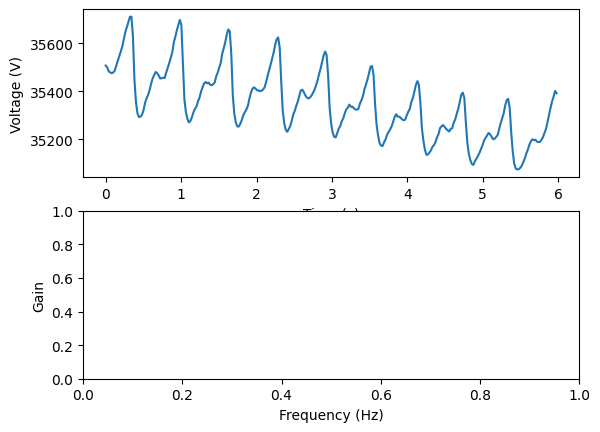

In [9]:
sRate=50
period = 1/sRate
nSamples=len(rs)
plt.figure(1)

plt.subplot(2,1,1)
x = np.linspace(0.0, nSamples*period, nSamples)
y = rs
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.plot(x,y)

plt.subplot(2,1,2)
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*period), nSamples//2) 
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
#plt.plot(xf, 2.0/nSamples * np.abs(yf[0:nSamples//2])) 
plt.plot(xf, yf)
plt.grid()
plt.show()

c:\Users\shama\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


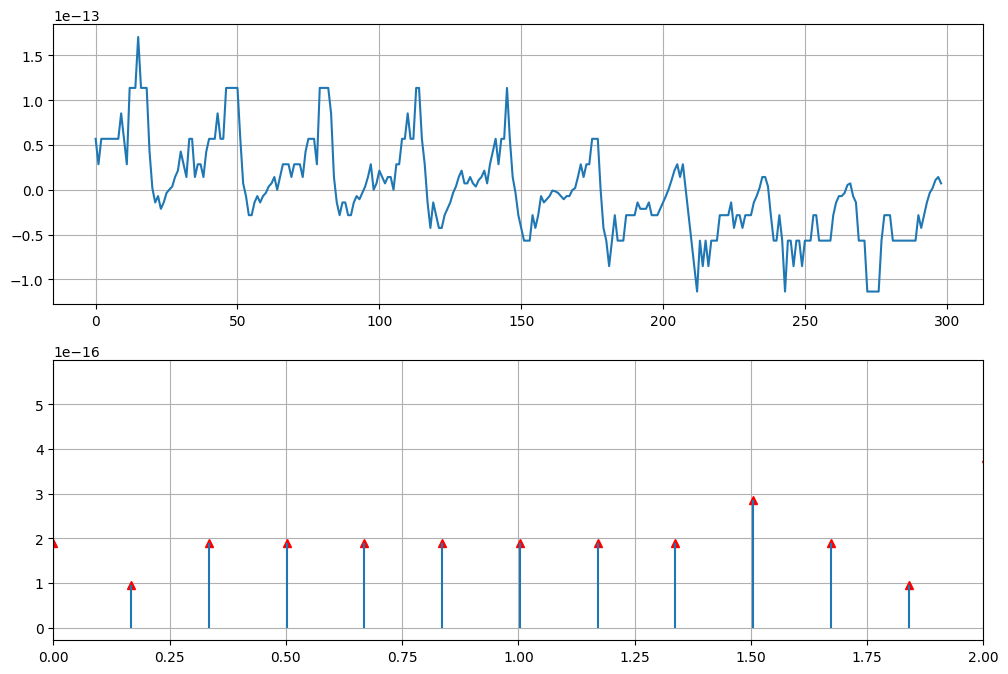

In [ ]:


n=len(rs)
k=np.arange(n)
Fs=50
T=n/Fs
freq=k/T
freq=freq[range(int(n/2))]
dc_remove_signal=rs-np.mean(rs)
dc_remove_signal=detrend(dc_remove_signal)
y=np.fft.fft(dc_remove_signal)/n
y=y[range(int(n/2))]
fig,ax = plt.subplots(2,1, figsize=(12, 8))
#axs[0].set(title='Visualization of PPG Signal before and after filtering')
ax[0].plot(dc_remove_signal)
ax[0].set_xlabel = ' Time'
ax[0].set_ylabel = ' Amplitude'; ax[0].grid(True)
ax[1].plot(freq, abs(y),'r',linestyle='',marker='^')
ax[1].set_xlabel = 'Freq(Hz)'
ax[1].set_ylabel = '|y(freq)|'
ax[1].vlines(freq,[0],abs(y))
ax[1].set_xlim(0,2);ax[1].grid(True)
plt.show()

In [ ]:
y=np.fft.fft(dc_remove_signal)/n
y=y[range(int(n/2))]

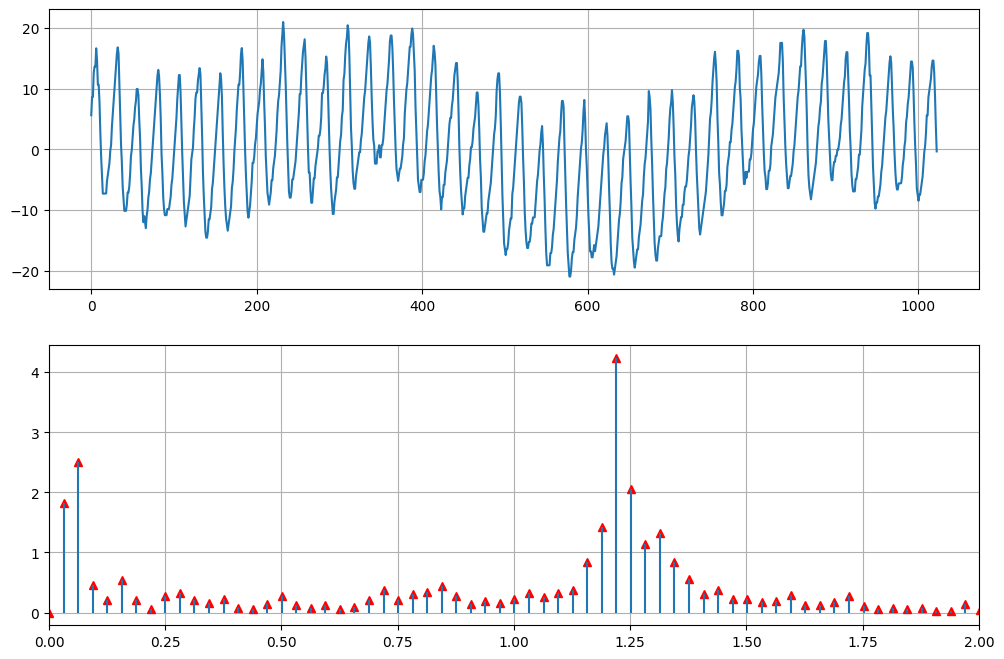

In [ ]:
fig,ax = plt.subplots(2,1, figsize=(12, 8))
#axs[0].set(title='Visualization of PPG Signal before and after filtering')
ax[0].plot(dc_remove_signal)
ax[0].set_xlabel = ' Time'
ax[0].set_ylabel = ' Amplitude'; ax[0].grid(True)
ax[1].plot(freq, abs(y),'r',linestyle='',marker='^')
ax[1].set_xlabel = 'Freq(Hz)'
ax[1].set_ylabel = '|y(freq)|'
ax[1].vlines(freq,[0],abs(y))
ax[1].set_xlim(0,2);ax[1].grid(True)
plt.show()

In [ ]:

def array_fft(signal, sample_rate, zoom_ratio=1):

    sample_signal = signal
    sample_size = sample_signal.size
    print(f"sample_size {sample_size}")
    
    # no matter even or odd
    med_ind = (sample_size // 2)
    print(f"med_ind {med_ind}")
    sampling_rate = sample_rate
    sample_space = 1 / sampling_rate
    t = np.linspace(0, 0+(sample_size*sample_space), sample_size)
    xf = fftfreq(t.size, sample_space)
    yf = (fft(sample_signal) / sample_size)[1:]
    yfm = np.abs(yf)

    zoom_freq = int(med_ind * zoom_ratio)
    xfr = xf[:med_ind][:zoom_freq]
    yfmr = yfm[:med_ind][:zoom_freq] 
    print(f"xfr_length {xfr.size}")
    max_ind = np.argmax(yfmr)
    print(f"max_freq {xfr[max_ind]}, minute_freq {xfr[max_ind] * 60}, max_amp {yfmr[max_ind]}")
    
    
    plt.figure(figsize=[18,12])
    plt.subplot(211)
    plt.plot(sample_signal[:3*sample_rate])

    plt.subplot(212)
    plt.plot(xfr, yfmr)
    


    plt.show()

sample_size 299
med_ind 149
xfr_length 104
max_freq 2.508361204013378, minute_freq 150.5016722408027, max_amp [119.43478261]


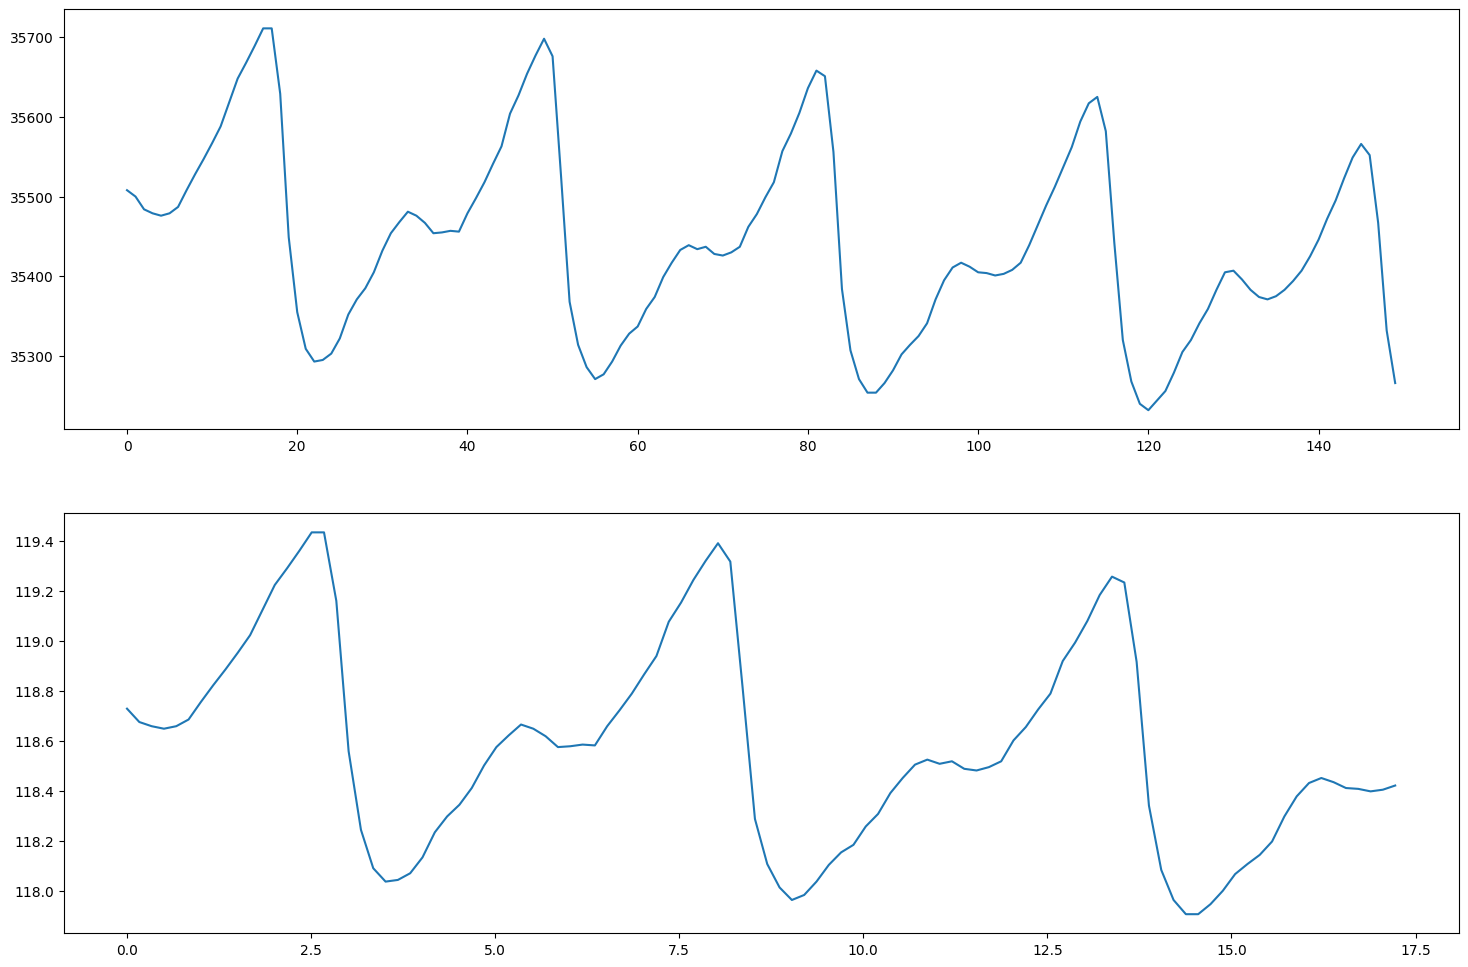

In [ ]:
array_fft(rs, sample_rate=50, zoom_ratio=0.7)